In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kvasir-dataset-v2']


In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = Path('../input/kvasir-dataset-v2/kvasir-dataset-v2')
path.ls()

[PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-z-line'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/ulcerative-colitis'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/dyed-resection-margins'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/dyed-lifted-polyps'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/esophagitis'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-pylorus'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-cecum'),
 PosixPath('../input/kvasir-dataset-v2/kvasir-dataset-v2/polyps')]

In [5]:
bs =64

tfms = get_transforms(do_flip=True)

In [9]:
data= ImageDataBunch.from_folder(path,ds_tfms=tfms,bs=bs,valid_pct=0.2,no_check=True,size=128)

In [10]:
data.classes

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

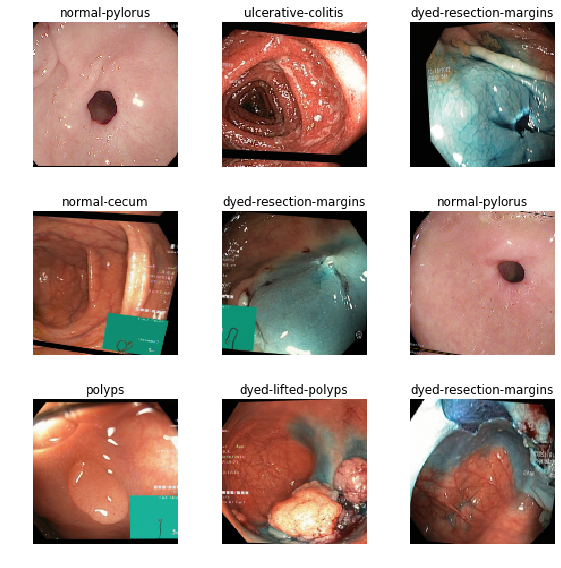

In [11]:
data.show_batch(rows=3 , figsize=(8,8))

In [13]:
learn = create_cnn(data,models.resnet34,metrics=error_rate,model_dir='/tmp/models')

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


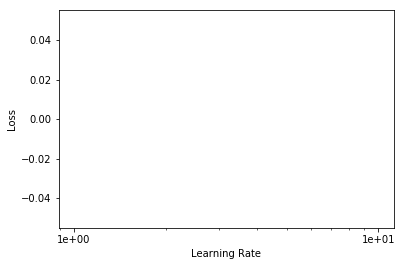

In [17]:
lr_find(learn)
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.991189,0.520599,0.205625,03:24
1,0.608777,0.414500,0.170000,03:20
2,0.469049,0.368420,0.148750,03:19
3,0.416866,0.358087,0.144375,03:20


In [19]:
learn.save('Kvasir-stage1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idx = interp.top_losses()
len(data.valid_ds)== len(losses)==len(idx)

True

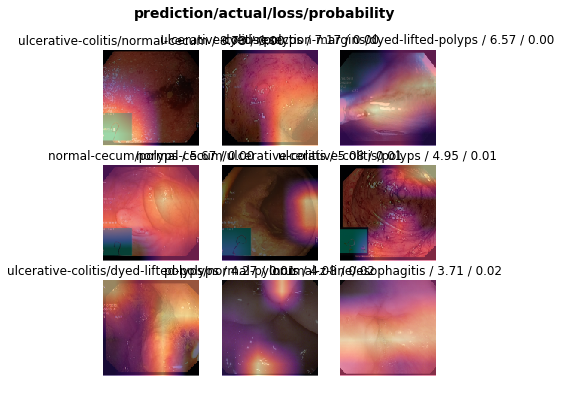

In [24]:
interp.plot_top_losses(9,figsize=(6,6))

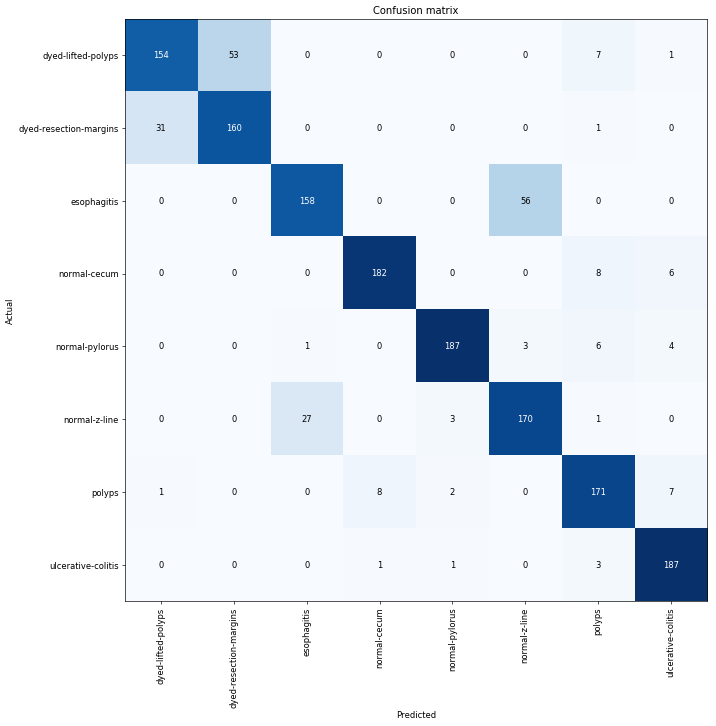

In [25]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [26]:
interp.most_confused(min_val=2)

[('esophagitis', 'normal-z-line', 56),
 ('dyed-lifted-polyps', 'dyed-resection-margins', 53),
 ('dyed-resection-margins', 'dyed-lifted-polyps', 31),
 ('normal-z-line', 'esophagitis', 27),
 ('normal-cecum', 'polyps', 8),
 ('polyps', 'normal-cecum', 8),
 ('dyed-lifted-polyps', 'polyps', 7),
 ('polyps', 'ulcerative-colitis', 7),
 ('normal-cecum', 'ulcerative-colitis', 6),
 ('normal-pylorus', 'polyps', 6),
 ('normal-pylorus', 'ulcerative-colitis', 4),
 ('normal-pylorus', 'normal-z-line', 3),
 ('normal-z-line', 'normal-pylorus', 3),
 ('ulcerative-colitis', 'polyps', 3),
 ('polyps', 'normal-pylorus', 2)]

In [34]:
learn.load('Kvasir-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (6400 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
normal-z-line,normal-z-line,normal-z-line,normal-z-line,normal-z-line
Path: ../input/kvasir-dataset-v2/kvasir-dataset-v2;

Valid: LabelList (1600 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dyed-resection-margins,normal-cecum,normal-cecum,normal-pylorus,normal-z-line
Path: ../input/kvasir-dataset-v2/kvasir-dataset-v2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


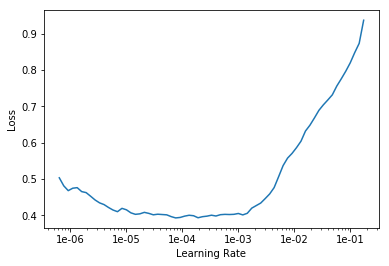

In [36]:
learn.recorder.plot()

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.401708,0.345455,0.139375,03:20
1,0.362961,0.331360,0.135625,03:18
2,0.325591,0.324079,0.129375,03:17
3,0.307112,0.315344,0.131875,03:18


In [39]:
learn.save('Kvest-stage-2')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

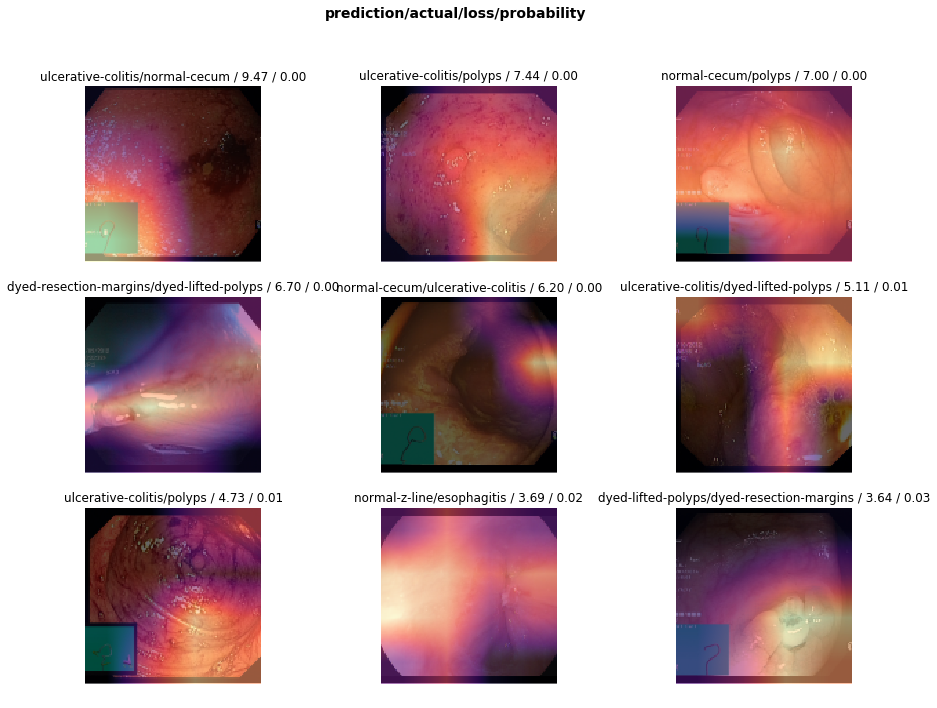

In [41]:
interp.plot_top_losses(9, figsize=(15,11))